# Pymaceuticals Inc.
---

### Analysis
1. The top treatments in tearms of effectiveness seem to be capomulin and ramicane. They showed similar reductions in tumor volume by the final timepoint on average.
2.  Heavier mice tend to have larger tumor volumes.
3. While there is a lot of data here, it is divided up over several types of treatments and different timepoints. In total there are only 248 mice, and each treatment only had a few dozen mice in it. I think that more data should be collected before drawing any final conclusions about these drugs or testing them on humans.

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head(12)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [121]:
# Checking the number of mice.
mouse_count = len(mouse_data_complete["Mouse ID"].unique())
mouse_count

249

In [122]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_data_complete[mouse_data_complete.duplicated()]
 
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [123]:
# Optional: Get all the data for the duplicate mouse ID. 



In [124]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (aka remove all records for that mouse)
# There are multiple ways of doing this and it is good to search online to see the suggestions.
mouse_data_complete.drop(mouse_data_complete[mouse_data_complete['Mouse ID'] == "g989"].index, inplace = True)
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [125]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(mouse_data_complete["Mouse ID"].unique())
mouse_count2

248

## Summary Statistics

In [126]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_data_grpd = mouse_data_complete.groupby('Drug Regimen')
mean_tumor_vol = mouse_data_grpd.mean()['Tumor Volume (mm3)']
med_tumor_vol = mouse_data_grpd.median()['Tumor Volume (mm3)']
tumor_vol_variance = mouse_data_grpd.var()['Tumor Volume (mm3)']
tumor_vol_sd = mouse_data_grpd.std()['Tumor Volume (mm3)']
tumor_vol_se = mouse_data_grpd.sem()['Tumor Volume (mm3)']

summary_stats = pd.DataFrame({ "Mean Tumor Volume": mean_tumor_vol,
                                       "Median Tumor Volume": med_tumor_vol,
                                        "Tumor Volume Variance": tumor_vol_variance,
                                        "Tumor Volume Std. Dev.": tumor_vol_sd,
                                       "Tumor Volume Std. Err.": tumor_vol_se})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

TypeError: 'str' object is not callable

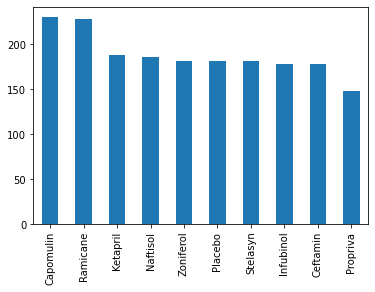

In [127]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# shift tab
regimens = mouse_data_complete['Drug Regimen'].value_counts()
regimens.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints for all Mice")

TypeError: 'str' object is not callable

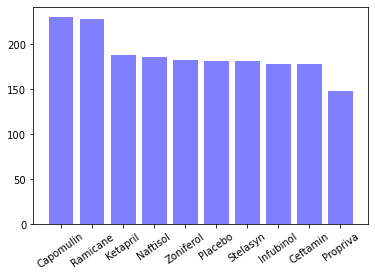

In [128]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_values = regimens.index.values
y_values = regimens.values
plt.bar(x_values, y_values, color='b', alpha=.5, align="center")
plt.xticks(rotation=35)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints for all Mice")
plt.bar


In [129]:
sex = mouse_data_complete['Sex'].value_counts()
sex

Male      958
Female    922
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x231228e2e80>,
 [Text(-0.681404241901343, -0.8635324308437154, 'male'),
  Text(0.6814042419013431, 0.8635324308437154, 'female')],
 [Text(-0.3716750410370961, -0.47101768955111745, '51.0%'),
  Text(0.3716750410370962, 0.47101768955111745, '49.0%')])

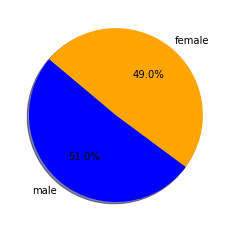

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using matplotlib (aka pyplot, plt)
# Same clarification as above.
labels = ["male", "female"]
sizes = [958, 922]
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)



## Quartiles, Outliers and Boxplots

In [131]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
tp_count = len(mouse_data_complete["Timepoint"].unique())
tp_count

10

In [132]:
# There are 10 unique timepoints in the original data, so I can tell 45 is the max by looking at the first 10 rows.
mouse_data_max_tp = mouse_data_complete.loc[mouse_data_complete['Timepoint']==45]
mouse_data_max_tp

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [133]:
# generate lists
treatments = ['capomulin', 'ramicane', 'infubinol', 'ceftamin']
capomulin_data = []
ramicane_data = []
infubinol_data = []
ceftamin_data = []

biglist = mouse_data_max_tp.values.tolist()

for i in biglist:
    if 'Capomulin' in i:
        capomulin_data.append(i[6])
    elif 'Ramicane' in i:
        ramicane_data.append(i[6])
    elif 'Infubinol' in i:
        infubinol_data.append(i[6])
    elif 'Ceftamin' in i:
        ceftamin_data.append(i[6]) 
        
# find outliers in:
# capomulin data
lowerq_cap = np.quantile(capomulin_data, .25)
upperq_cap = np.quantile(capomulin_data, .75)
iqr_cap = upperq_cap - lowerq_cap
lower_bound_cap = lowerq_cap - 1.5*iqr_cap
upper_bound_cap = upperq_cap + 1.5*iqr_cap

outliers_cap = (capomulin_data <= lower_bound_cap) | (capomulin_data >= upper_bound_cap)

#ramicane
lowerq_ram = np.quantile(ramicane_data, .25)
upperq_ram = np.quantile(ramicane_data, .75)
iqr_ram = upperq_ram - lowerq_ram
lower_bound_ram = lowerq_ram - 1.5*iqr_ram
upper_bound_ram = upperq_ram + 1.5*iqr_ram

outliers_ram = (ramicane_data <= lower_bound_ram) | (ramicane_data >= upper_bound_ram)

#infubinol
lowerq_inf = np.quantile(infubinol_data, .25)
upperq_inf = np.quantile(infubinol_data, .75)
iqr_inf = upperq_inf - lowerq_inf
lower_bound_inf = lowerq_inf - 1.5*iqr_inf
upper_bound_inf = upperq_inf + 1.5*iqr_inf

outliers_inf = (infubinol_data <= lower_bound_inf) | (infubinol_data >= upper_bound_inf)

#ceftamin
lowerq_cef = np.quantile(ceftamin_data, .25)
upperq_cef = np.quantile(ceftamin_data, .75)
iqr_cef = upperq_cef - lowerq_cef
lower_bound_cef = lowerq_cef - 1.5*iqr_cef
upper_bound_cef = upperq_cef + 1.5*iqr_cef

outliers_cef = (ceftamin_data <= lower_bound_cef) | (ceftamin_data >= upper_bound_cef)

# my calculations are not showing outliers, maybe I should have done it using a different method

C:\Users\ameli\AppData\Local\Temp/ipykernel_15008/1388046688.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


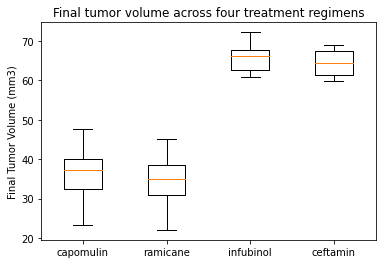

In [134]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_data = [capomulin_data, ramicane_data, infubinol_data, ceftamin_data]
fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume across four treatment regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
ax1.boxplot(box_data)

plt.show()

## Line and Scatter Plots

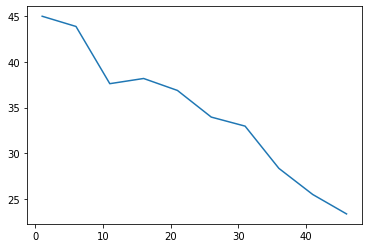

In [135]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin (mouse s185)
x_axis = np.arange(1,50,5)
tumor_vol = [45, 43.88, 37.61, 38.18, 36.87, 33.95, 32.96, 28.33, 25.47, 23.34]
plt.xlabel = ('Timepoint(days)')
plt.ylabel = ('Tumor Volume (mm3)')
plt.plot(x_axis, tumor_vol)

In [152]:
# Generate a scatter plot of average tumor volume vs. average mouse weight of each mouse treated with the Capomulin regimen
# The chart below shows a dot for each mouse treated with Capomulin using average weight and average tumor Volume.
#  I would make the X-label say something like "Average Weight (g)"

biggerlist = mouse_data_complete.values.tolist()
tumor_vol_cap = []
timepoint_cap = []
weight_cap = []
for i in biggerlist:
    if 'Capomulin' in i:
        tumor_vol_cap.append(i[6])
        timepoint_cap.append(i[5])
        weight_cap.append(i[4])
        
zipped = list(zip(weight_cap, timepoint_cap, tumor_vol_cap))
capomulin_df = pd.DataFrame(zipped, columns=['weight (g)', 'timepoint', 'tumor volume (mm3)'])
capomulin_df.head()


,weight (g),timepoint,tumor volume (mm3)
0,17,0,45.000000
1,17,5,43.878496
2,17,10,37.614948
3,17,15,38.177232
4,17,20,36.866876


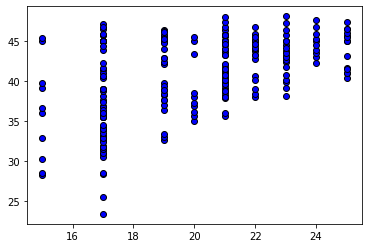

In [156]:
x_limit = 30
x_axis = capomulin_df['weight (g)']
y_axis = capomulin_df['tumor volume (mm3)']

plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')


## Correlation and Regression

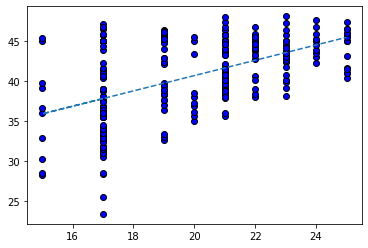

In [159]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = capomulin_df.iloc[:,0]
tum_vol = capomulin_df.iloc[:,2]
slope, c_int, r, p, std_err = st.linregress(weight, tum_vol)

fit = slope*weight + c_int

x_limit = 30
x_axis = capomulin_df['weight (g)']
y_axis = capomulin_df['tumor volume (mm3)']
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.plot(weight, fit,"--")